# Introduction to OpenCV

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual

In [2]:
plt.rcParams["figure.figsize"] = (15,7) # change the plot size of matplotlib

In [3]:
#ls

In [3]:
# Load a color image in grayscale
img_gray = cv.imread('beach.JPG',0)    # this function does not throw an error if the path is not correct!
# TODO: Add information about the flags cv.IMREAD_COLOR, cv.IMREAD_GRAYSCALE and cv.IMREAD_UNCHANGED 

## Displaying images

In [5]:
# Displaying an image in an image window. The window will be sized according to the image
# Depending on the screen layout the window might be hidden behind your current working window!

cv.imshow('image',img_gray)   # the first argument is the window name
cv.waitKey(0)                 # the window will close after "x" milliseconds, if "0" it waits for any keystroke
cv.destroyAllWindows() 

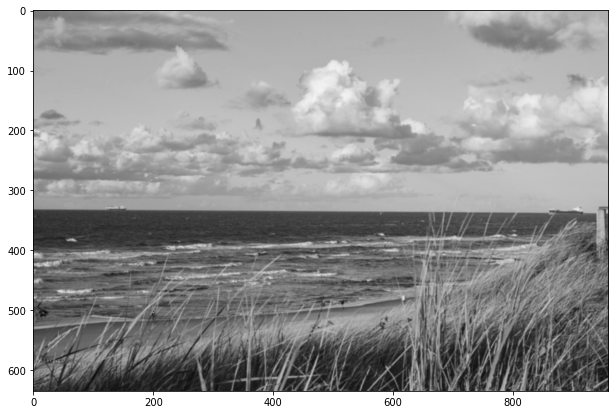

In [5]:
# Displaying an image with matplotlib
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')      # TODO: explanation about interpolation
#plt.xticks([]), plt.yticks([])                                     # to hide tick values on X and Y axis
plt.show()

## Resizing images
interpolations for zooming: 
- cv2.INTER_LINEAR (default)
- cv2.INTER_CUBIC (slow)

interpolation for shringking:
-  cv2.INTER_AREA

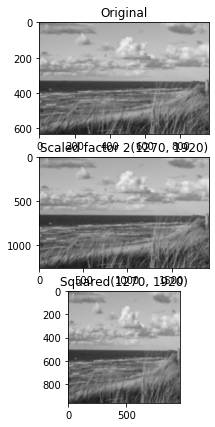

In [6]:
image = img_gray.copy()
height, width = image.shape[:2]
res = cv.resize(image,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

square_img = cv.resize(image,(width, width), interpolation = cv.INTER_CUBIC)

plt.subplot(311),plt.imshow(image, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
plt.subplot(312),plt.imshow(res, cmap = 'gray', interpolation = 'bicubic'), plt.title('Scaled factor 2' + str(res.shape))
plt.subplot(313),plt.imshow(square_img, cmap = 'gray', interpolation = 'bicubic'), plt.title('Squared' + str(res.shape))
plt.show()

## Rotating images
In order to rotate an image we first need to calculate the retval the rotation matrix and then apply the rotation matrix with cv.warpAffine().

- center:	is the center of the rotation in the source image
- angle:	Rotation angle in degrees. Positive values mean counter-clockwise rotation. **Coordinate origin is the top-left corner.**
- scale:	scale factor

In [8]:
rows,cols = img_gray.shape
center = ((cols-1)//2,(rows-1)//2)
angle = 90
scale = 1
rot_M = retval	=	cv.getRotationMatrix2D(center, angle, scale)

In [14]:
img_rot = dst = cv.warpAffine(img_gray,rot_M,(cols, rows))

(<matplotlib.axes._subplots.AxesSubplot at 0x2b1c3008f88>,
 Text(0.5, 1.0, 'Rotated image'))

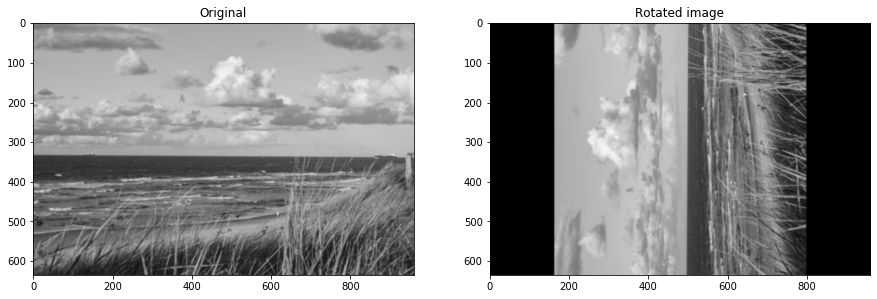

In [15]:
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
plt.subplot(122),plt.imshow(img_rot, cmap = 'gray', interpolation = 'bicubic'), plt.title('Rotated image')

## Writing images

In [7]:
cv.imwrite('beachgray.png',img_gray)    # first argument is name of image, second is image
# TODO: Does cv.imwrite() overwrite exisiting files?
# TODO: What are the supported file formats for saving images?

True

## Creating binary images from grayscale image

In [9]:
@interact                                     # running with interact is too slow
#@interact_manual
def display_binary(thresh_val=(0,255,1)):
    _,thresh1 = cv.threshold(img_gray, thresh_val, 255,cv.THRESH_BINARY)
    plt.imshow(thresh1, cmap = 'gray', interpolation = 'bicubic') 
    plt.show()
    return #thresh1; 

interactive(children=(IntSlider(value=127, description='thresh_val', max=255), Output()), _dom_classes=('widge…

In [8]:
thresh_val = 138
_, img_binary = cv.threshold(img_gray, thresh_val, 255,cv.THRESH_BINARY)

## 2D Convolution ( Image Filtering )

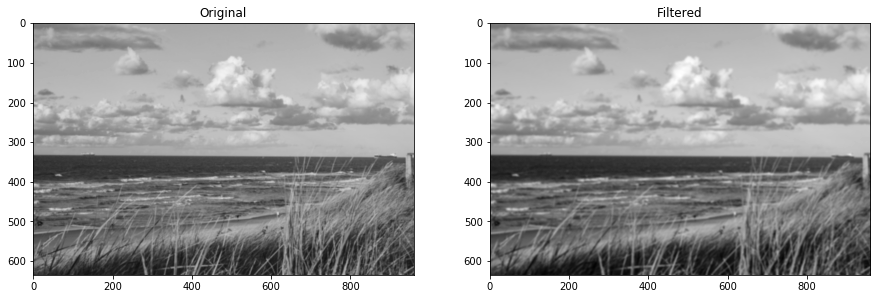

In [9]:
# when ddepth=-1, the output image will have the same depth as the source image
kernel = np.ones((5,5),np.float32)/25
target_img = cv.filter2D(img_gray,-1,kernel)            # image,ddepth, kernel
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
plt.subplot(122),plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic'), plt.title('Filtered')
plt.show()

##  Gaussian blur


Gaussian blurring is highly effective for removing gaussian noise from images.
The kernel size defines the dimensions of the blur. It has to be an **odd** number and minimum size is 3.

In [10]:
@interact_manual
def gaussian_blurred(kernel_size=(3,20,2)):
    gray_blur = cv.GaussianBlur(img_gray, (kernel_size,kernel_size), 0) # img, (kernelsize,kernelsize), standard deviation
    plt.subplot(121),plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
    blur_title = "Gaussian Blur - kernel size: "+ str(kernel_size) 
    plt.subplot(122),plt.imshow(gray_blur, cmap = 'gray', interpolation = 'bicubic'), plt.title(blur_title)
    plt.show()
    return

interactive(children=(IntSlider(value=11, description='kernel_size', max=20, min=3, step=2), Button(descriptio…

## Median blurring
Median blurring is used to removesalt-and-pepper noise from images.

In [ ]:
# TODO: Create an image with salt-and-pepper noise.
# TODO: Implement coding example for median blurring

In [ ]:
!ls

## Bilateral Filters
TODO: write example
gray = cv2.bilateralFilter(gray, 11, 17, 17)

https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed

https://www.pyimagesearch.com/2014/04/21/building-pokedex-python-finding-game-boy-screen-step-4-6/

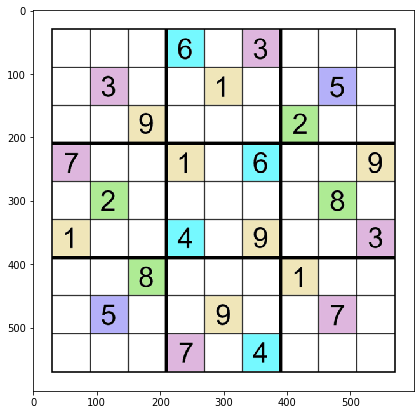

(<matplotlib.image.AxesImage at 0x264e8632908>, None)

In [10]:
sudoku_color = cv.imread('sudoku_color.png',cv.IMREAD_COLOR)
sudoku_gray = cv.imread('sudoku_color.png',0)
plt.imshow(sudoku_color), plt.show()

In [ ]:
plt.imshow(sudoku_gray, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [22]:
@ interact_manual
def show_canny_edge(min_val=(0,255,1)):
    edges = cv.Canny(sudoku_gray,min_val,200)   # image, min_val, max_val
    plt.subplot(121),plt.imshow(sudoku_gray,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

interactive(children=(IntSlider(value=127, description='min_val', max=255), Button(description='Run Interact',…

In [23]:
import numpy as np
import cv2 as cv
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')
# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:                          # use "esc" to close the window TODO: all windows should be closed with the same key
        break
    # get current positions of four trackbarsb
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows() 

# Feature detection
## Harris Corner Detection


In [24]:
#cv.cornerHarris(img_gray, block_size, k_size, k) 
# img_gray: grayscale image, float 32 type
# block_size: size of considered pixel neighbourhood
# k_size: aperture parameter of Sobel derivative
# k: free parameter for Harris Detector where k is an empirically determined constant[0.04,0.06] according to Wikipedia

#img_gray   # TODO: How can you find out the type of an numpy array?
@ interact_manual(block_size=(1,10,1), k_size= (1,31,2), k= (0.04, 0.06, 0.001) )
def harris_corners(block_size=5, k_size= 3, k= 0.06 ):
    sudoku = sudoku_color.copy() 
    #sudoku_gray = 
    gray32 = np.float32(sudoku_gray)
    corners = cv.cornerHarris(gray32, block_size,k_size, k)
    
    # dilate the corners for better contrast
    corners = cv.dilate(corners,None)
    
    
    # Threshold for an optimal value, it may vary depending on the image.
    sudoku[corners>0.01*corners.max()]=[0,0,255]
    
    plt.subplot(121),plt.imshow(sudoku,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(corners,cmap = 'gray')
    plt.title('Harris Corner Detection'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

# TODO: k is only changing on 0.01 scale

interactive(children=(IntSlider(value=5, description='block_size', max=10, min=1), IntSlider(value=3, descript…

## Canny edge detection
Canny edge detection is a popular multistage edge detection algorithm.
- Stage 1: Noise Reduction
- Stage 2: Finding intensity edge gradients of the image
- Stage 3: Non-maximum Suppression
- Stage 4: Hysteresis thresholding to decide which edges are really edges (minVal, maxVal)

cv.Canny(img_gray, minVal, maxVal, apertureSize = 3)

In [25]:
@interact_manual(minVal=(0,255,1), maxVal=(0,255,1))
def canny_edges(minVal=100, maxVal=200):
    edges = cv.Canny(sudoku_gray, minVal, maxVal)

    plt.subplot(121),plt.imshow(sudoku_gray,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
    return

interactive(children=(IntSlider(value=100, description='minVal', max=255), IntSlider(value=200, description='m…

## Video capture
Using cv.VideoCapture(camera_id) requires the correct versions of ffmpeg or gstreamer.

In [26]:
cap = cv.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv.imshow('frame',frame)
    if cv.waitKey(1) & 0xFF == ord('q'):         # video capture has to be interrupted by pressing "q"
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows() 


## FAST Algorithm for corner detection
This algorithm is suitable for realtime applications

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  924
Total Keypoints without nonmaxSuppression: 6385


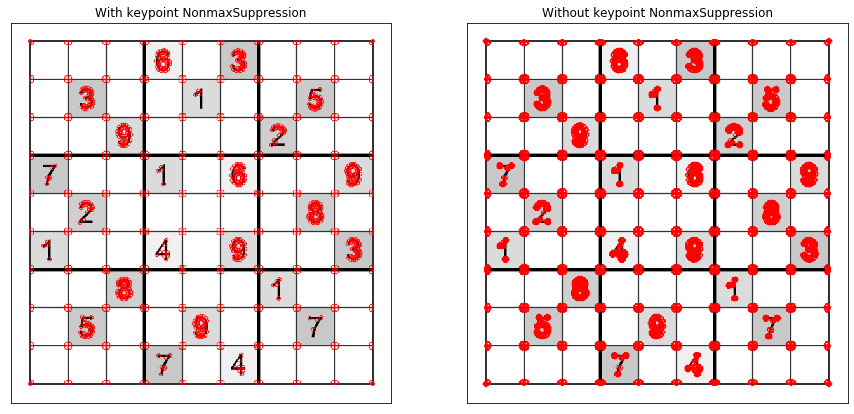

In [19]:
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(sudoku_gray,None)
img2 = cv.drawKeypoints(sudoku_gray, kp, color=(255,0,0), outImage = sudoku_gray)

# Print all default params
print ("Threshold: ", fast.getThreshold())
print ("nonmaxSuppression: ", fast.getNonmaxSuppression())
print ("neighborhood: ", fast.getType())
print ("Total Keypoints with nonmaxSuppression: ", len(kp))

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(sudoku_gray,None)


print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(sudoku_gray, kp, None, color=(255,0,0))


plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('With keypoint NonmaxSuppression'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3,cmap = 'gray')
plt.title('Without keypoint NonmaxSuppression'), plt.xticks([]), plt.yticks([])

plt.show()

## Hough line detection
source image, voting space spatial resolution, voting space angular resolution, minimum votes threshold, minimum line length, and maximum allowed gap between points on the same line to link them

cv.HoughLines()  returns an array of (rho, theta) values. rho is measured in pixels and theta is measured in radians.

TODO: add details about cv.HoughLines() vs cv.HoughLinesP()

In [40]:
lines = cv.HoughLines(sudoku_gray, 1, np.pi/180, 100, 100, 10)

(Text(0.5, 1.0, 'Hough line detection'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

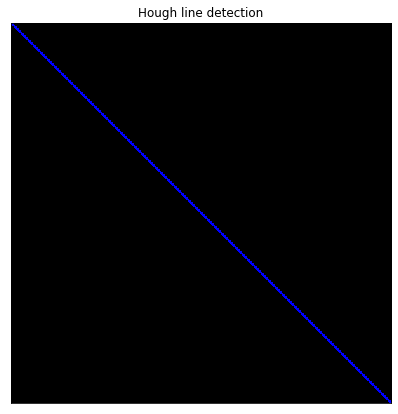

In [42]:
dbg_img = np.zeros((sudoku_gray.shape[0], sudoku_gray.shape[1], 3), np.uint8) 
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(dbg_img,(x1,y1),(x2,y2),(0,0,255),2)
    #cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
plt.subplot(121),plt.imshow(dbg_img,cmap = 'gray')
plt.title('Hough line detection'), plt.xticks([]), plt.yticks([])

## Histogram equalization
Histogram equalization improves the contrast of an image by stretching out the intensity rate. It mpas the distribution (the given histogram of the source image) to another distribution that covers all intensity levels.

In [6]:
image_contrast = cv.equalizeHist(img_gray)

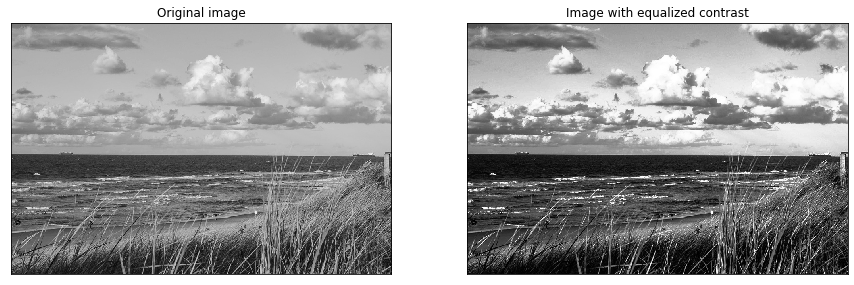

In [7]:
plt.subplot(121),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_contrast,cmap = 'gray')
plt.title('Image with equalized contrast'), plt.xticks([]), plt.yticks([])
plt.show()